In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_apy_keys

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_apy_keys
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bdaf3e8151a19ca98ef77e9d31475625


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | diamantino
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | cherskiy
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | jining
Processing Record 8 of Set 1 | poitiers
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | noumea
Processing Record 11 of Set 1 | palestine
Processing Record 12 of Set 1 | fairbanks
Processing Record 13 of Set 1 | coihaique
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | mount gambier
Processing Record 18 of Set 1 | yanan
City not found. Skipping...
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | marawi
Processing Record 21 of Set 1 | lompoc
Processing Record 22 of Set 1 | kaitangata
Proc

Processing Record 38 of Set 4 | dawson creek
Processing Record 39 of Set 4 | tuatapere
Processing Record 40 of Set 4 | chuy
Processing Record 41 of Set 4 | hofn
Processing Record 42 of Set 4 | george town
Processing Record 43 of Set 4 | alice springs
Processing Record 44 of Set 4 | stokmarknes
Processing Record 45 of Set 4 | kavaratti
Processing Record 46 of Set 4 | mazamitla
Processing Record 47 of Set 4 | asyut
Processing Record 48 of Set 4 | amderma
City not found. Skipping...
Processing Record 49 of Set 4 | kota bahru
Processing Record 50 of Set 4 | margate
Processing Record 1 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 2 of Set 5 | sable-sur-sarthe
Processing Record 3 of Set 5 | airai
Processing Record 4 of Set 5 | berlevag
Processing Record 5 of Set 5 | satitoa
City not found. Skipping...
Processing Record 6 of Set 5 | port hardy
Processing Record 7 of Set 5 | cradock
Processing Record 8 of Set 5 | linxia
Processing Record 9 of Set 5 | taoudenni
Processing Re

Processing Record 24 of Set 8 | roma
Processing Record 25 of Set 8 | litoral del san juan
City not found. Skipping...
Processing Record 26 of Set 8 | dauphin
Processing Record 27 of Set 8 | kharan
Processing Record 28 of Set 8 | rudbar
Processing Record 29 of Set 8 | haines junction
Processing Record 30 of Set 8 | gberia fotombu
Processing Record 31 of Set 8 | kenora
Processing Record 32 of Set 8 | northam
Processing Record 33 of Set 8 | pauini
Processing Record 34 of Set 8 | kushmurun
Processing Record 35 of Set 8 | saint-augustin
Processing Record 36 of Set 8 | saint-pierre
Processing Record 37 of Set 8 | tayoltita
Processing Record 38 of Set 8 | voh
Processing Record 39 of Set 8 | qasigiannguit
Processing Record 40 of Set 8 | kavieng
Processing Record 41 of Set 8 | puerto madryn
Processing Record 42 of Set 8 | mount isa
Processing Record 43 of Set 8 | vagay
Processing Record 44 of Set 8 | rio branco
Processing Record 45 of Set 8 | kuche
City not found. Skipping...
Processing Record 

Processing Record 11 of Set 12 | evensk
Processing Record 12 of Set 12 | yuli
Processing Record 13 of Set 12 | celbridge
Processing Record 14 of Set 12 | pervomayskiy
Processing Record 15 of Set 12 | buchanan
Processing Record 16 of Set 12 | namibe
Processing Record 17 of Set 12 | grande prairie
Processing Record 18 of Set 12 | ixtapa
Processing Record 19 of Set 12 | maxixe
Processing Record 20 of Set 12 | toktogul
Processing Record 21 of Set 12 | temaraia
City not found. Skipping...
Processing Record 22 of Set 12 | el sauzal
Processing Record 23 of Set 12 | novikovo
Processing Record 24 of Set 12 | yablonovo
Processing Record 25 of Set 12 | luau
Processing Record 26 of Set 12 | haibowan
City not found. Skipping...
Processing Record 27 of Set 12 | amuntai
Processing Record 28 of Set 12 | batemans bay
Processing Record 29 of Set 12 | huarmey
Processing Record 30 of Set 12 | lastoursville
Processing Record 31 of Set 12 | praia
Processing Record 32 of Set 12 | abu kamal
Processing Record 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Diamantino,-14.4086,-56.4461,77.11,85,96,2.55,BR,2021-01-14 23:26:53
1,Mataura,-46.1927,168.8643,73.00,64,31,3.00,NZ,2021-01-14 23:26:53
2,Bilibino,68.0546,166.4372,-23.21,83,97,0.96,RU,2021-01-14 23:26:53
3,Saskylakh,71.9167,114.0833,-46.98,76,47,2.08,RU,2021-01-14 23:26:53
4,Cherskiy,68.7500,161.3000,-24.38,84,96,5.93,RU,2021-01-14 23:26:53
5,Hithadhoo,-0.6000,73.0833,81.55,78,100,17.36,MV,2021-01-14 23:26:53
6,Jining,35.4050,116.5814,39.99,1,100,1.01,CN,2021-01-14 23:26:53
7,Poitiers,46.5833,0.3333,46.40,76,75,14.97,FR,2021-01-14 23:26:53
8,Hobart,-42.8794,147.3294,59.00,55,75,5.75,AU,2021-01-14 23:26:07
9,Noumea,-22.2763,166.4572,82.40,74,0,6.91,NC,2021-01-14 23:25:01


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_new_df = city_data_df[new_column_order]
city_data_new_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Diamantino,BR,2021-01-14 23:26:53,-14.4086,-56.4461,77.11,85,96,2.55
1,Mataura,NZ,2021-01-14 23:26:53,-46.1927,168.8643,73.00,64,31,3.00
2,Bilibino,RU,2021-01-14 23:26:53,68.0546,166.4372,-23.21,83,97,0.96
3,Saskylakh,RU,2021-01-14 23:26:53,71.9167,114.0833,-46.98,76,47,2.08
4,Cherskiy,RU,2021-01-14 23:26:53,68.7500,161.3000,-24.38,84,96,5.93
5,Hithadhoo,MV,2021-01-14 23:26:53,-0.6000,73.0833,81.55,78,100,17.36
6,Jining,CN,2021-01-14 23:26:53,35.4050,116.5814,39.99,1,100,1.01
7,Poitiers,FR,2021-01-14 23:26:53,46.5833,0.3333,46.40,76,75,14.97
8,Hobart,AU,2021-01-14 23:26:07,-42.8794,147.3294,59.00,55,75,5.75
9,Noumea,NC,2021-01-14 23:25:01,-22.2763,166.4572,82.40,74,0,6.91


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

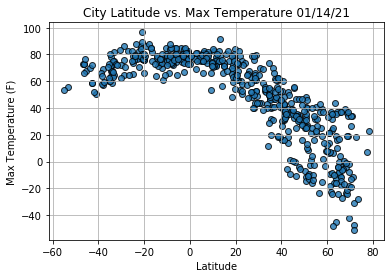

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

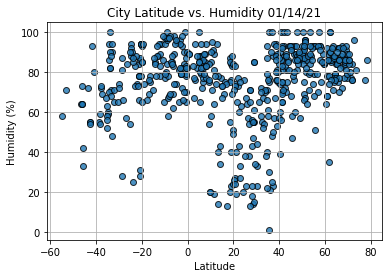

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

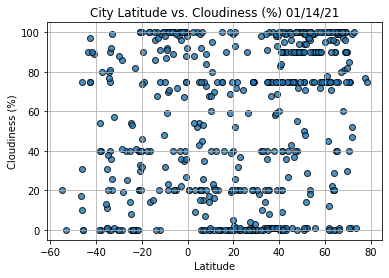

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

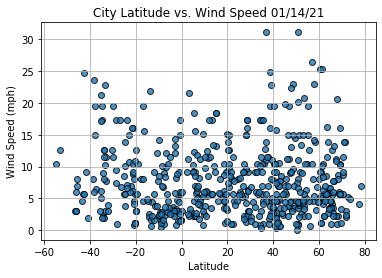

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                 Ponta Do Sol
Lat                       32.6667
Lng                         -17.1
Max Temp                    53.01
Humidity                       55
Cloudiness                     10
Wind Speed                   5.99
Country                        PT
Date          2021-01-14 23:26:54
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
539     True
540     True
541     True
542     True
543     True
Name: Lat, Length: 544, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Bilibino,68.0546,166.4372,-23.21,83,97,0.96,RU,2021-01-14 23:26:53
3,Saskylakh,71.9167,114.0833,-46.98,76,47,2.08,RU,2021-01-14 23:26:53
4,Cherskiy,68.7500,161.3000,-24.38,84,96,5.93,RU,2021-01-14 23:26:53
6,Jining,35.4050,116.5814,39.99,1,100,1.01,CN,2021-01-14 23:26:53
7,Poitiers,46.5833,0.3333,46.40,76,75,14.97,FR,2021-01-14 23:26:53


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

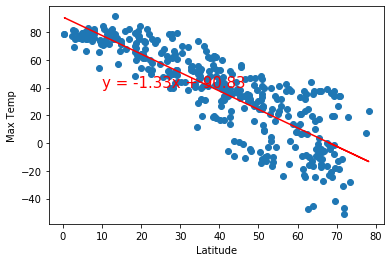

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

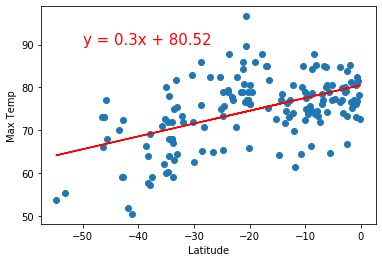

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

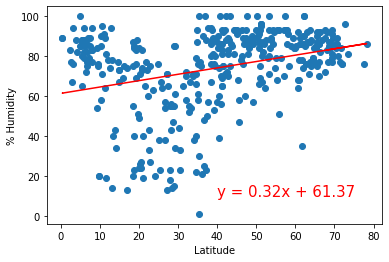

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

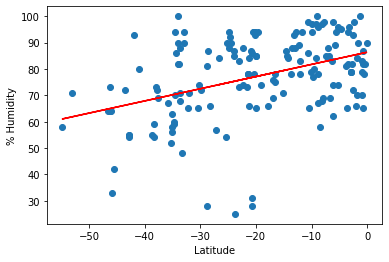

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

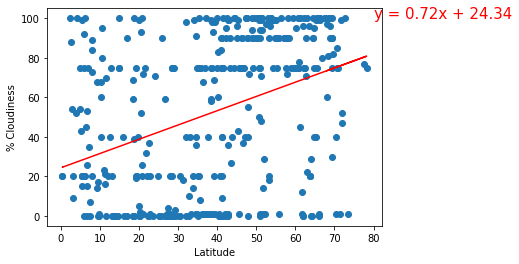

In [27]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(80, 100))

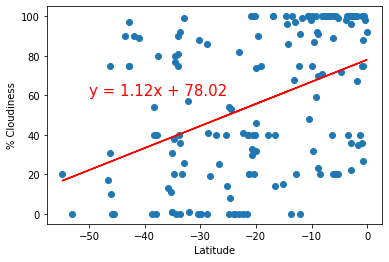

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

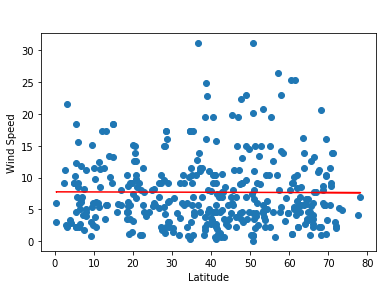

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

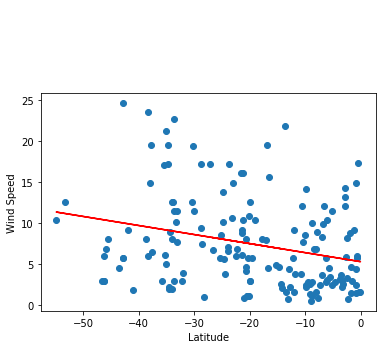

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))